In [12]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from operator import attrgetter

### **Load Data**

In [13]:
data = pd.read_csv('../data/processed/master_data.csv', engine='pyarrow')
data

,customer_unique_id,customer_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,seller_id,price,order_item_count,product_category_name,product_category_name_english,payment_sequential,payment_type,payment_installments,payment_value,review_score
0,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,1554a68530182680ad5c8b042c3ab563,39.99,1.0,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0
1,b7d76e111c89f7ebf14761390f0f7d17,08c5351a6aca1c1589a38f244edeee9d,69309,boa vista,RR,2e7a8482f6fb09756ca50c10d7bfc047,shipped,2016-09-04 21:15:19,2016-10-07 13:18:03,2016-10-18 13:14:51,...,1554a68530182680ad5c8b042c3ab563,32.90,1.0,moveis_decoracao,furniture_decor,1.0,credit_card,1.0,136.23,1.0
2,4854e9b3feff728c13ee5fc7d1547e92,683c54fc24d40ee9f8a6fc179fd9856c,99025,passo fundo,RS,e5fa5a7210941f7d56d0208e4e071d35,canceled,2016-09-05 00:15:34,2016-10-07 13:17:15,NaT,...,a425f92c199eb576938df686728acd20,59.50,1.0,telefonia,telephony,1.0,credit_card,3.0,75.06,1.0
3,009b0127b727ab0ba422f6d9604487c7,622e13439d6b5a0b486c435618b2679e,12244,sao jose dos campos,SP,809a282bbd5dbcabb6f2f724fca862ec,canceled,2016-09-13 15:24:19,2016-10-07 13:16:46,NaT,...,unknown,NaN,1.0,diversas,miscellaneous,1.0,credit_card,2.0,40.95,1.0
4,830d5b7aaa3b6f1e9ad63703bec97d23,86dc2ffce2dfff336de2f386a786e574,14600,sao joaquim da barra,SP,bfbd0f9bdef84302105ad712db648a6c,delivered,2016-09-15 12:16:38,2016-09-15 12:16:38,2016-11-07 17:11:53,...,ecccfa2bb93b34a3bf033cc5d1dcdc69,44.99,3.0,beleza_saude,health_beauty,1.0,credit_card,1.0,143.46,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
107850,9bb92bebd4cb7511e1a02d5e50bc4655,2823ffda607a2316375088e0d00005ec,7176,guarulhos,SP,392ed9afd714e3c74767d0c4d3e3f477,canceled,2018-09-29 09:13:03,NaT,NaT,...,unknown,NaN,1.0,diversas,miscellaneous,1.0,voucher,1.0,137.03,1.0
107851,634420a0ea42302205032ed44ac7fccc,bf6181a85bbb4115736c0a8db1a53be3,27175,pirai,RJ,616fa7d4871b87832197b2a137a115d2,canceled,2018-10-01 15:30:09,NaT,NaT,...,unknown,NaN,1.0,diversas,miscellaneous,1.0,voucher,1.0,80.38,2.0
107852,af5454198a97379394cacf676e1e96cb,4c2ec60c29d10c34bd49cb88aa85cfc4,11900,registro,SP,a2ac6dad85cf8af5b0afb510a240fe8c,canceled,2018-10-03 18:55:29,NaT,NaT,...,unknown,NaN,1.0,diversas,miscellaneous,1.0,voucher,1.0,197.55,1.0
107853,262e1f1e26e92e86375f86840b4ffd63,856336203359aa6a61bf3826f7d84c49,64600,picos,PI,b059ee4de278302d550a3035c4cdb740,canceled,2018-10-16 20:16:02,NaT,NaT,...,unknown,NaN,1.0,diversas,miscellaneous,1.0,voucher,1.0,222.03,5.0


In [14]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107855 entries, 0 to 107854
Data columns (total 23 columns):
 #   Column                         Non-Null Count   Dtype         
---  ------                         --------------   -----         
 0   customer_unique_id             107855 non-null  object        
 1   customer_id                    107855 non-null  object        
 2   customer_zip_code_prefix       107855 non-null  int64         
 3   customer_city                  107855 non-null  object        
 4   customer_state                 107855 non-null  object        
 5   order_id                       107855 non-null  object        
 6   order_status                   107855 non-null  object        
 7   order_purchase_timestamp       107855 non-null  datetime64[ns]
 8   order_approved_at              107694 non-null  datetime64[ns]
 9   order_delivered_carrier_date   105950 non-null  datetime64[ns]
 10  order_delivered_customer_date  104691 non-null  datetime64[ns]
 11  

### **Data Analysis**

In [15]:
# buat copyan data utama
data_eda = data.copy()

# tambahkan kolom tanggal, bulan, tahun 
data_eda['order_date'] = data_eda['order_purchase_timestamp'].dt.date
data_eda['order_month'] = data_eda['order_purchase_timestamp'].dt.to_period('M')
data_eda['order_year'] = data_eda['order_purchase_timestamp'].dt.to_period('Y')

In [24]:
data_eda['order_status'].unique()

array(['shipped', 'canceled', 'delivered', 'invoiced', 'unavailable',
       'processing', 'approved', 'created'], dtype=object)

#### **Order Trend**

In [25]:
dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('order_month')['payment_value'].sum()
dfOrd = data_eda.groupby('order_month')['order_id'].nunique()
dfCust = data_eda.groupby('order_month')['customer_unique_id'].nunique()

dfTrend = pd.concat([dfRev,dfOrd,dfCust], axis=1).rename(columns={"payment_value": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers"})
dfTrend.head()

,revenue,n_orders,n_customers
order_month,,,
2016-09,395.70,4,4
2016-10,59090.48,324,321
2016-12,19.62,1,1
2017-01,138488.04,800,765
2017-02,291908.01,1780,1755


<Axes: xlabel='order_month'>

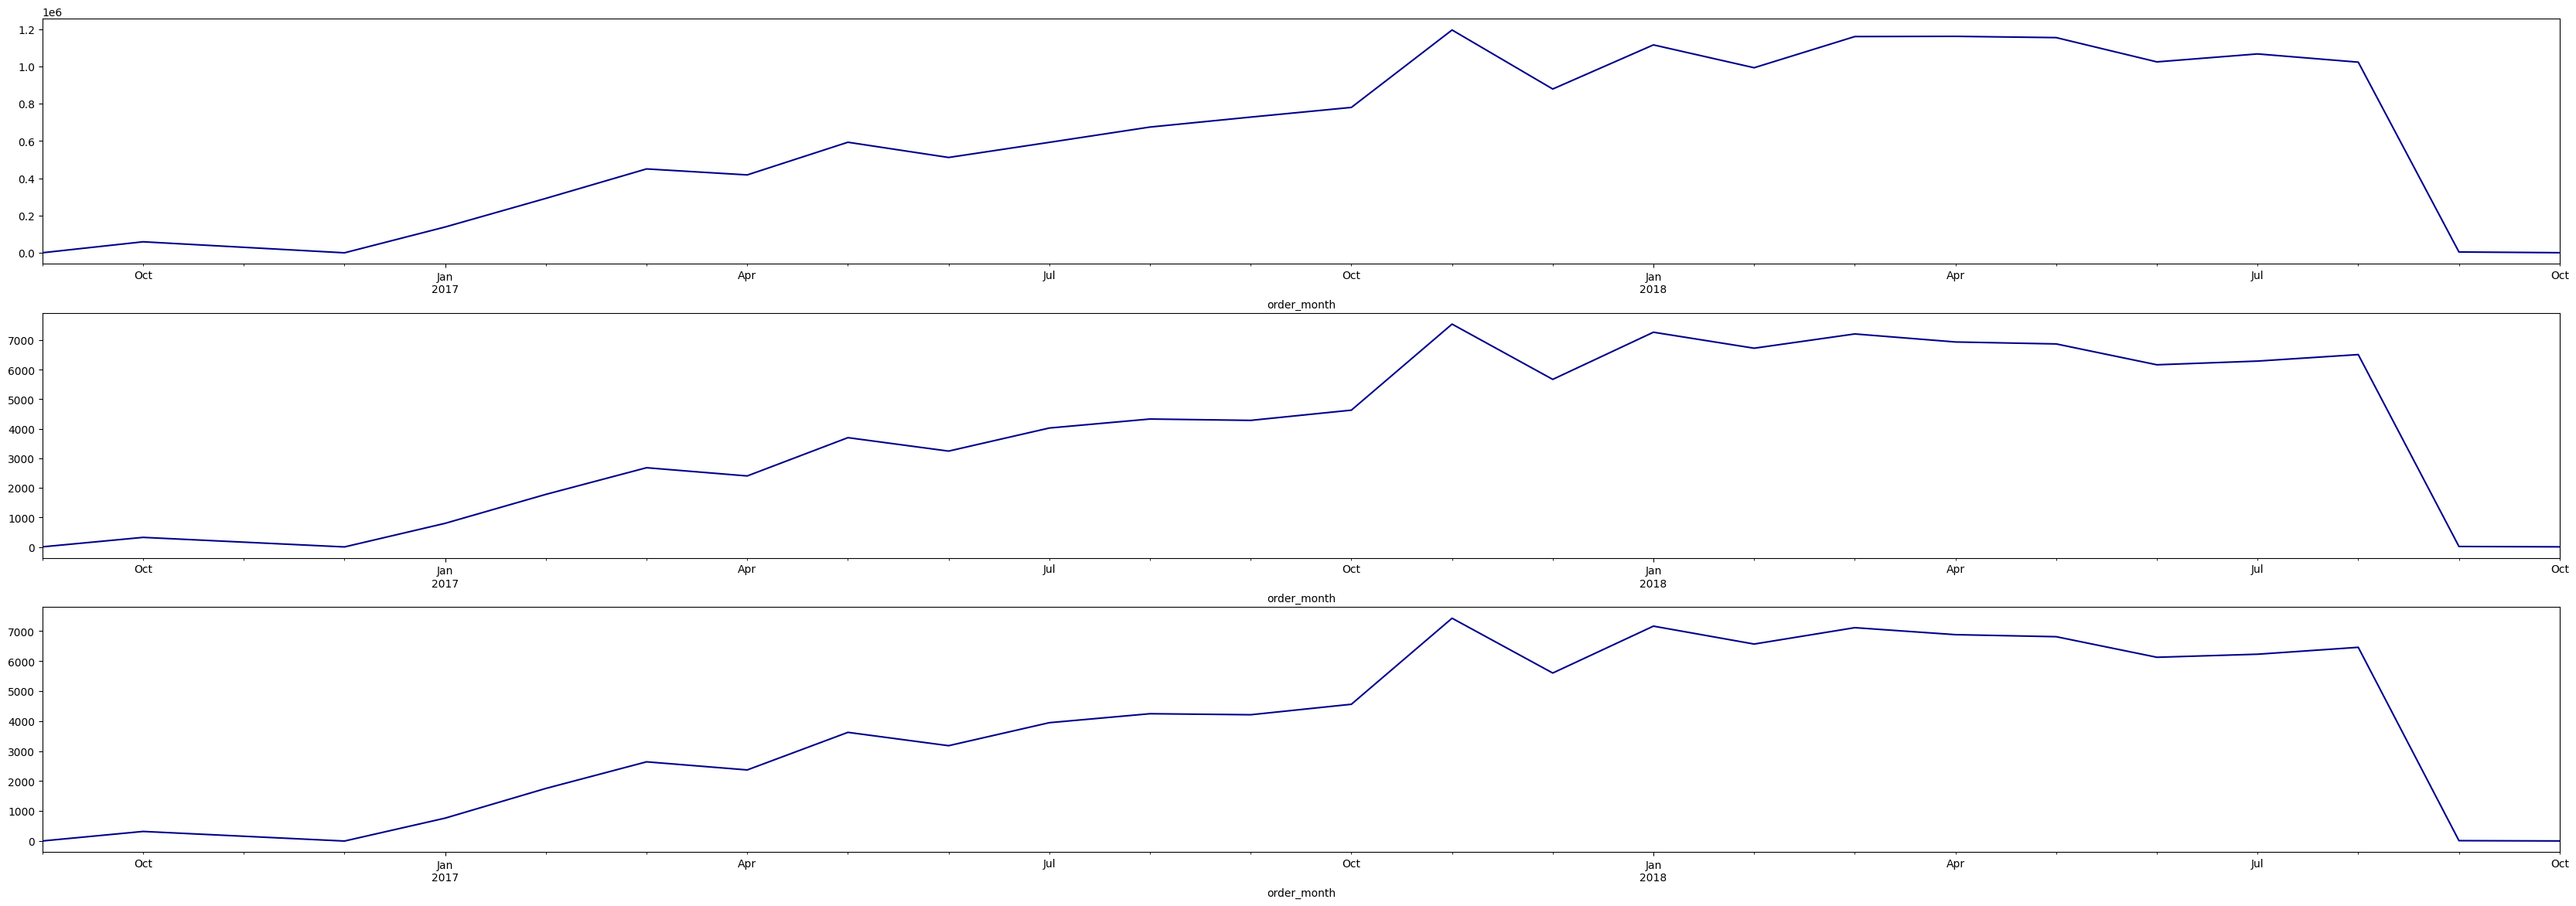

In [26]:
fig, axes = plt.subplots(3,1, figsize=(42, 14))
dfTrend['revenue'].plot(kind='line', color='darkblue', ax=axes[0])
dfTrend['n_orders'].plot(kind='line', color='darkblue', ax=axes[1])
dfTrend['n_customers'].plot(kind='line', color='darkblue', ax=axes[2])


#### **Sales per State**

#### **Sales per Product**

##### **Proportion**

In [55]:
dfRev = data_eda.query('order_status != "canceled" or order_status != "unavailable"').drop_duplicates(subset=['order_id','order_purchase_timestamp','payment_sequential','payment_value'], keep='first').groupby('product_category_name_english')['price'].sum()
dfOrd = data_eda.groupby('product_category_name_english')['order_id'].nunique()
dfCust = data_eda.groupby('product_category_name_english')['customer_unique_id'].nunique()

dfProd = pd.concat([dfRev,dfOrd,dfCust], axis=1).reset_index().rename(columns={"price": "revenue", "order_id": "n_orders", "customer_unique_id": "n_customers", 'product_category_name_english':'product'})

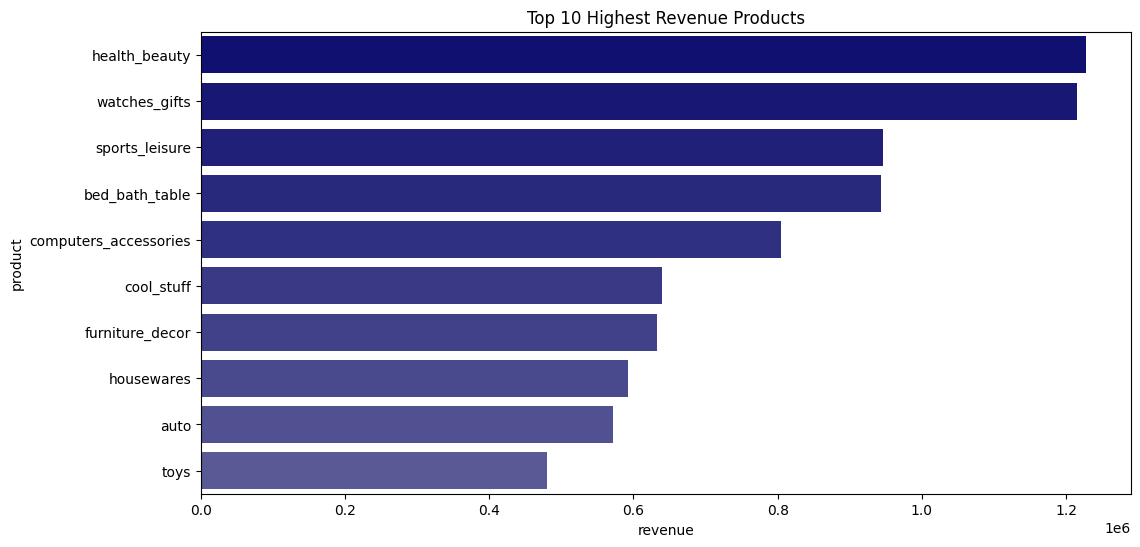

In [60]:
color_palette = sns.blend_palette(['navy', 'lightgrey'], 25)

# Visualisasi
plt.figure(figsize=(12,6))
sns.barplot(data=dfProd.nlargest(10, columns='revenue'), x = 'revenue', y='product', palette=color_palette)
plt.title(f'Top 10 Highest Revenue Products')
plt.show()

##### **Kuadran**

#### **Customer Behaviour**

##### **Time Likelihood**

In [86]:
data_eda['order_hour'] = data_eda['order_purchase_timestamp'].dt.strftime('%H').astype('int')
data_eda['day_of_week'] = data_eda['order_purchase_timestamp'].dt.day_of_week
data_eda['day_name'] = data_eda['day_of_week'].map({ 0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday', 4: 'Friday', 5: 'Saturday', 6: 'Sunday' })

In [94]:
dfTime = data_eda.drop_duplicates(subset='order_id').groupby(by=['order_hour','day_of_week','day_name'])['order_id'].nunique().reset_index()
dfTime.head()

,order_hour,day_of_week,day_name,order_id
0,0,0,Monday,328
1,0,1,Tuesday,306
2,0,2,Wednesday,397
3,0,3,Thursday,355
4,0,4,Friday,426


In [102]:
timePur = dfTime.pivot_table(values='order_id', index='order_hour', columns=['day_of_week','day_name'],aggfunc='sum')
timePur.head()

day_of_week,0,1,2,3,4,5,6
day_name,Monday,Tuesday,Wednesday,Thursday,Friday,Saturday,Sunday
order_hour,,,,,,,
0,328,306,397,355,426,315,267
1,134,158,179,167,216,175,141
2,66,80,81,75,72,67,69
3,36,28,33,39,49,43,44
4,21,29,33,31,40,25,27


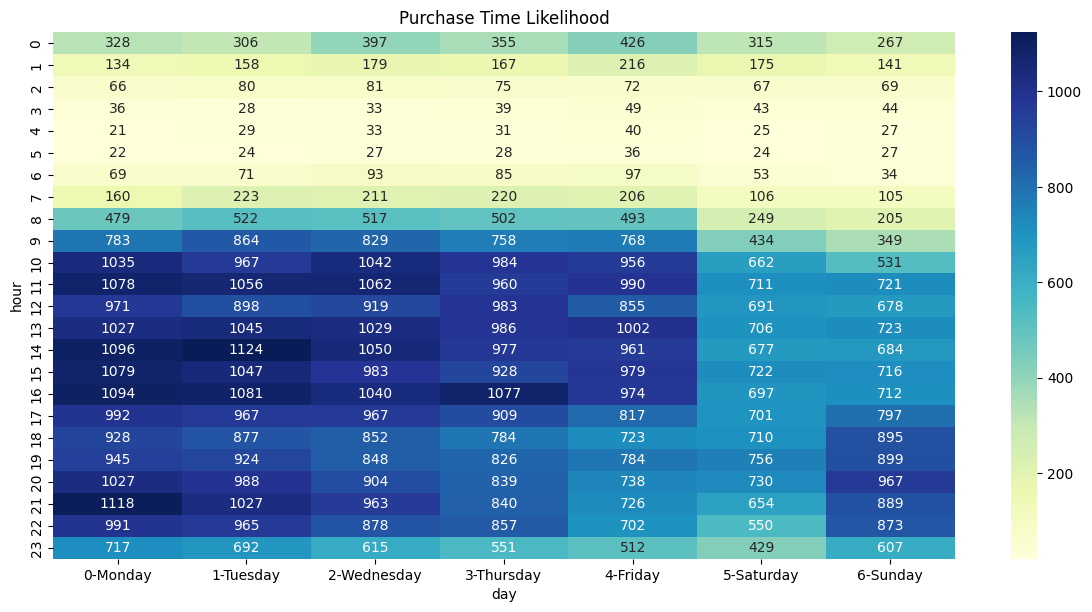

In [117]:
plt.figure(figsize=(12,6))
sns.heatmap(timePur,
            annot=True,
            fmt='g',
            cmap='YlGnBu',)
plt.tight_layout()
plt.xlabel('day')
plt.ylabel('hour')
plt.title('Purchase Time Likelihood')
plt.show()

##### **Payment Type**

##### **Installment**

#### **Customer Retention**

In [18]:
dfCohort = data_eda.drop_duplicates(subset='order_id', keep='first')[['customer_unique_id', 'order_month']]
dfCohort['cohort_month'] = dfCohort.groupby('customer_unique_id')['order_month'].transform('min')
dfCohort.head()

,customer_unique_id,order_month,cohort_month
0,b7d76e111c89f7ebf14761390f0f7d17,2016-09,2016-09
2,4854e9b3feff728c13ee5fc7d1547e92,2016-09,2016-09
3,009b0127b727ab0ba422f6d9604487c7,2016-09,2016-09
4,830d5b7aaa3b6f1e9ad63703bec97d23,2016-09,2016-09
5,0eb1ee9dba87f5b36b4613a65074337c,2016-10,2016-10


In [19]:
# Number of distinct customer
dfCohort = dfCohort.groupby(['order_month','cohort_month'])\
            .agg(n_customers = ('customer_unique_id', 'nunique'))\
            .reset_index(drop=False)

# Period = current month - cohort month
dfCohort['period'] = (dfCohort['order_month'] - dfCohort['cohort_month']).apply(attrgetter('n'))

dfCohort.head()

,order_month,cohort_month,n_customers,period
0,2016-09,2016-09,4,0
1,2016-10,2016-10,321,0
2,2016-12,2016-12,1,0
3,2017-01,2016-12,1,1
4,2017-01,2017-01,764,0


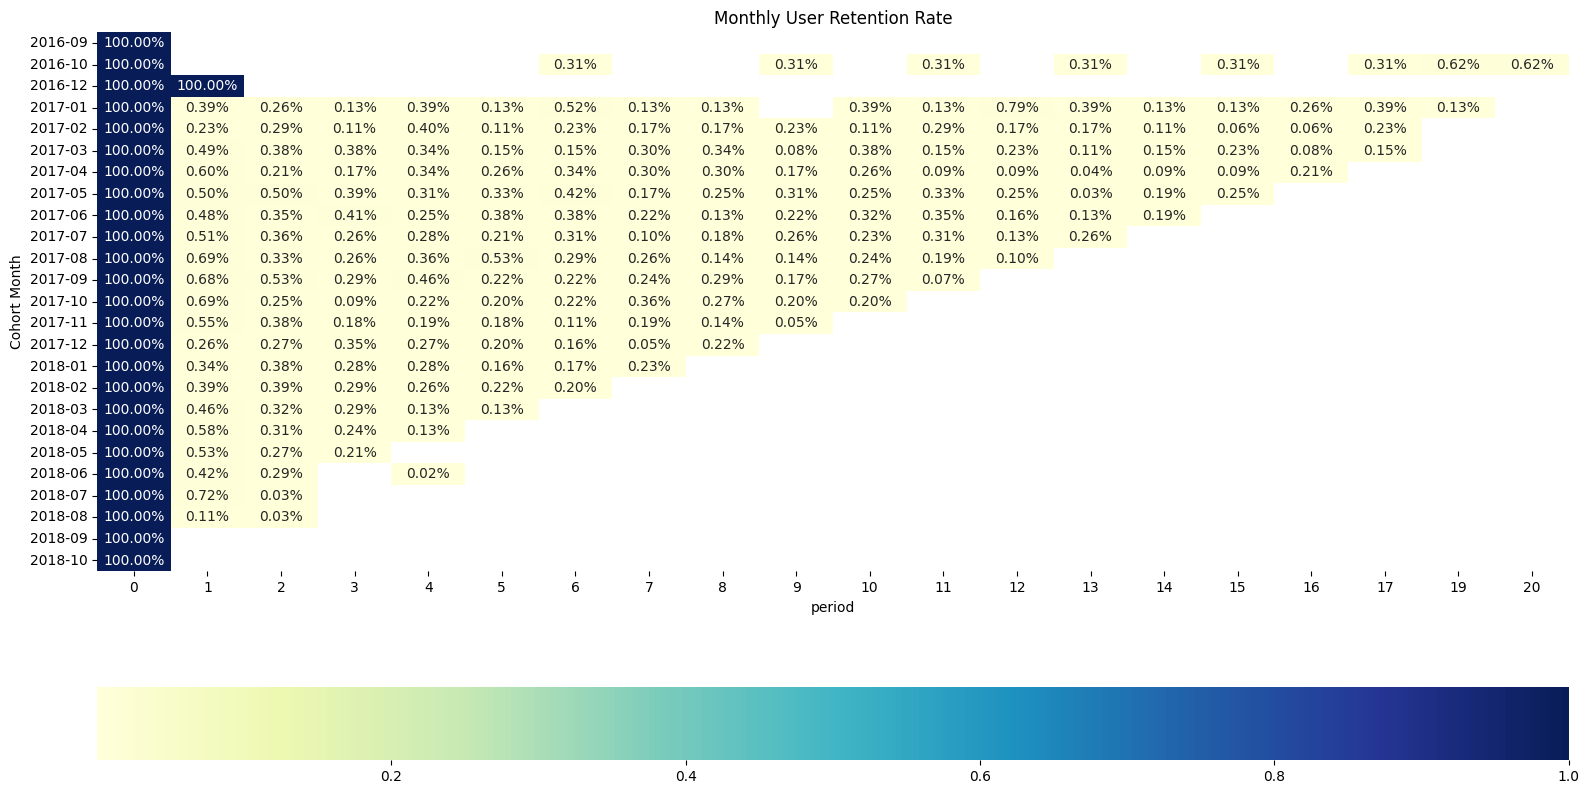

In [20]:
# Pivot Cohort
pivot_cohort = dfCohort.pivot_table(index='cohort_month', columns='period', values='n_customers')
pivot_cohort = pivot_cohort.divide(pivot_cohort[0], axis=0)

plt.figure(figsize=(16,8))
sns.heatmap(pivot_cohort,
            annot=True,
            fmt='.2%',
            cmap='YlGnBu',
            cbar_kws={'orientation':'horizontal'})
plt.tight_layout()
plt.xlabel('period')
plt.ylabel('Cohort Month')
plt.title('Monthly User Retention Rate')
plt.show()